# Vorhersage vom Baujahr

In [2]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from xgboost import XGBClassifier
import xgboost

In [3]:
df = pd.read_csv('preprocessed.csv')

In [4]:
# reduce for testing
df = df.sample(frac=0.01, random_state=1)

In [6]:
X = df.drop(columns=["constructionTime"])
Y = df["constructionTime"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
le = LabelEncoder()
y_train = le.fit_transform(y_train)

# Baseline (Logistic regression)

In [51]:
baseline = LogisticRegression()
  
# fitting the model
baseline.fit(X_train, y_train)

/home/glatzl/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
# score
y_pred = baseline.predict(X_test)
y_pred = le.inverse_transform(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


0.08865710560625815

# Gradient Boost Classifier

### Hyperparameter tuning

In [53]:
model = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [ ]:
cv = GridSearchCV(model, parameters, cv=5, n_jobs=-1)
cv.fit(X_train, y_train)

In [ ]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [ ]:
display(cv)

Best parameters are: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}


0.071 + or -0.002 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.074 + or -0.01 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.116 + or -0.009 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.138 + or -0.018 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.092 + or -0.011 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.14 + or -0.015 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.199 + or -0.012 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.222 + or -0.015 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.111 + or -0.009 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.164 + or -0.023 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.222 + or -0.02 for the {'learning_rate': 0.01, 'max_dept

In [1]:
# fit model no training data
model = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=500)
model.fit(X_train, y_train)

NameError: name 'GradientBoostingClassifier' is not defined

0.2737940026075619

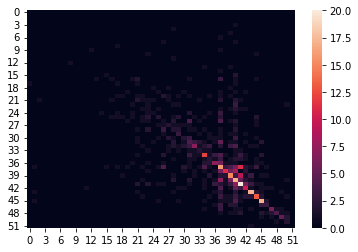

In [56]:
# score
y_pred = model.predict(X_test)
y_pred = le.inverse_transform(y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm)
accuracy_score(y_test, y_pred)

# Same with XGBoost

In [7]:
# fit model no training data
model = XGBClassifier(n_jobs=-1)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

0.21642764015645372

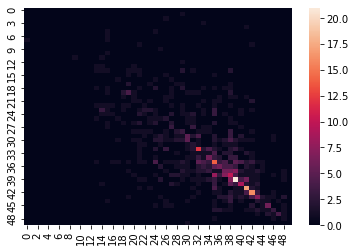

In [8]:
# score
y_pred = model.predict(X_test)
y_pred = le.inverse_transform(y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm)
accuracy_score(y_test, y_pred)

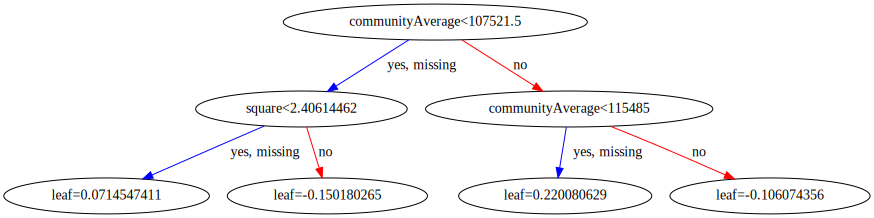

In [21]:
xgboost.to_graphviz(model, num_trees=0)